### Importing the Libraries

In [111]:
# linear algebra
import numpy as np 

# data processing
import pandas as pd 

# data visualization
import seaborn as sns
%matplotlib inline
from matplotlib import pyplot as plt
#from matplotlib import style
plt.style.use('ggplot')

import warnings
warnings.filterwarnings("ignore")

# Algorithms
from sklearn import linear_model
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.naive_bayes import GaussianNB

### Getting the Data

In [112]:
test_df = pd.read_csv("test.csv")
train_df = pd.read_csv("train.csv")

In [113]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


#### From the table above, we can note a few things.
- First of all, that we need to convert a lot of features into numeric ones later on, so that the machine learning algorithms can process them.
- Furthermore, we can see that the features have widely different ranges, that we will need to convert into roughly the same scale. We can also spot some more features, that contain missing values (NaN = not a number), that wee need to deal with

In [114]:
test_df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


### Data Exploration/Analysis

In [115]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


#### The training-set has 891 examples and 11 features + the target variable (survived).
#### 2 of the features are floats, 5 are integers and 5 are objects.
#### Below I have listed the features with a short description:
- survival:    Survival 
- PassengerId: Unique Id of a passenger. 
- pclass:    Ticket class     
- sex:    Sex     
- Age:    Age in years     
- sibsp:    # of siblings / spouses aboard the Titanic     
- parch:    # of parents / children aboard the Titanic     
- ticket:    Ticket number     
- fare:    Passenger fare     
- cabin:    Cabin number     
- embarked:    Port of Embarkation

In [116]:
train_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


#### We can see that 38% out of the training-set survived the Titanic.
#### We can also see that the passenger ages range from 0.4 to 80.
#### On top of that we can already detect some features, that contain missing values, like the ‘Age’ feature.

### Let’s take a more detailed look at what data is actually missing:

In [117]:
missing = train_df.isnull().sum().sort_values(ascending=False)
missing_percent = train_df.isnull().sum()/len(train_df)*100
missing_percent = (round(missing_percent, 1)).sort_values(ascending=False)
missing_data = pd.concat([missing, missing_percent], axis=1, keys=['Total', '% of data missing'])
missing_data.head(5)

,Total,% of data missing
Cabin,687,77.1
Age,177,19.9
Embarked,2,0.2
Fare,0,0.0
Ticket,0,0.0


- The Embarked feature has only 2 missing values, which can easily be filled. It will be much more tricky, to deal with the ‘Age’ feature, which has 177 missing values. The ‘Cabin’ feature needs further investigation, but it looks like that we might want to drop it from the dataset, since 77% of it are missing.

# EDA
### 1. Age and Sex

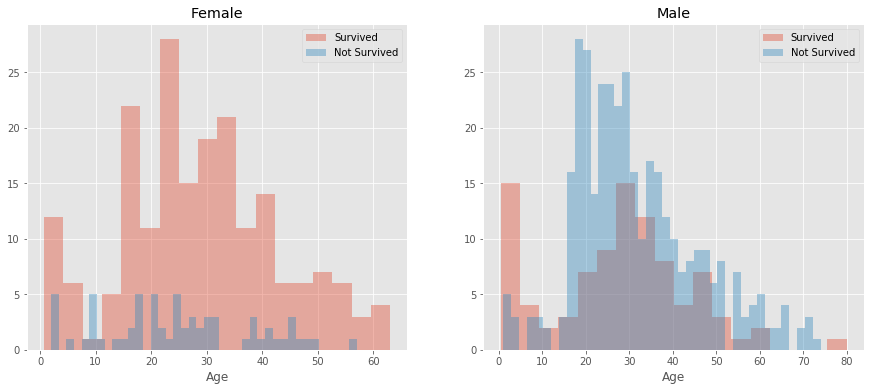

In [118]:
fig, axes = plt.subplots(nrows=1, ncols=2,figsize=(15, 6))
women = train_df[train_df.Sex == 'female']
men = train_df[train_df.Sex == 'male']
ax = sns.distplot(women[women['Survived']==1].Age.dropna(), bins=18, label = 'Survived', ax = axes[0], kde = False)
ax = sns.distplot(women[women['Survived']==0].Age.dropna(), bins=40, label = 'Not Survived', ax = axes[0], kde =False)
ax.legend()
ax.set_title('Female')
ax = sns.distplot(men[men['Survived']==1].Age.dropna(), bins=18, label = 'Survived', ax = axes[1], kde = False)
ax = sns.distplot(men[men['Survived']==0].Age.dropna(), bins=40, label = 'Not Survived', ax = axes[1], kde = False)
ax.legend()
_ = ax.set_title('Male')

##### You can see that men have a high probability of survival when they are between 18 and 30 years old, which is also a little bit true for women but not fully. For women the survival chances are higher between 14 and 40.
##### For men the probability of survival is very low between the age of 5 and 18, but that isn’t true for women. Another thing to note is that infants also have a little bit higher probability of survival.
##### Since there seem to be certain ages, which have increased odds of survival and because we want every feature to be roughly on the same scale, we will create age groups later on.

### 2. Embarked, Pclass and Sex:

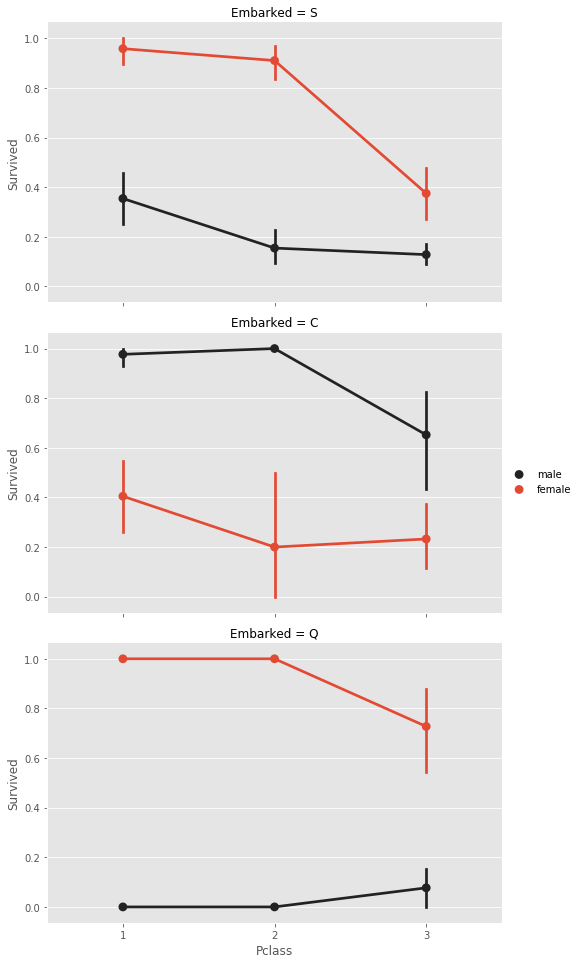

In [119]:
FacetGrid = sns.FacetGrid(train_df, row='Embarked', size=4.5, aspect=1.6)
FacetGrid.map(sns.pointplot, 'Pclass', 'Survived', 'Sex', palette=None,  order=None, hue_order=None )
_ = FacetGrid.add_legend()

#### Embarked seems to be correlated with survival, depending on the gender.
- Women on port Q and on port S have a higher chance of survival but lower survival chance if they are at port C.
- Men have a high survival probability if they are on port C, but a low probability if they are on port Q or S.
- Pclass also seems to be correlated with survival. We will generate another plot of it below.

.

### 3. Pclass

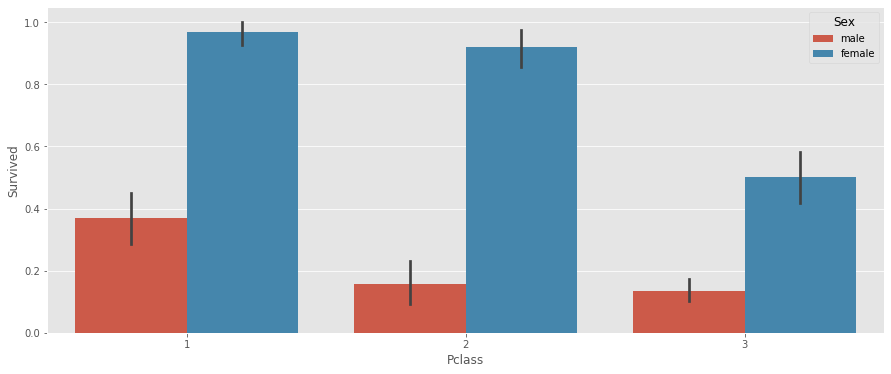

In [120]:
plt.figure(figsize=(15, 6))
_ = sns.barplot(x='Pclass', y='Survived', hue='Sex', data=train_df)

#### Here we see clearly, that Pclass is contributing to a person's chance of survival, especially if this person is in class 1 or 2. Also, the survival rate is even higher if the person is a women from class 1 or 2.

### 4. SibSp and Parch:
- SibSp and Parch would make more sense as a combined feature, that shows the total number of relatives, a person has on the Titanic.
- We will create it below and also a feature that shows if someone is alone or not.

In [121]:
data = [train_df, test_df]
for dataset in data:
    dataset['relatives'] = dataset['SibSp'] + dataset['Parch']
    dataset.loc[dataset['relatives'] > 0, 'Alone'] = 0
    dataset.loc[dataset['relatives'] == 0, 'Alone'] = 1


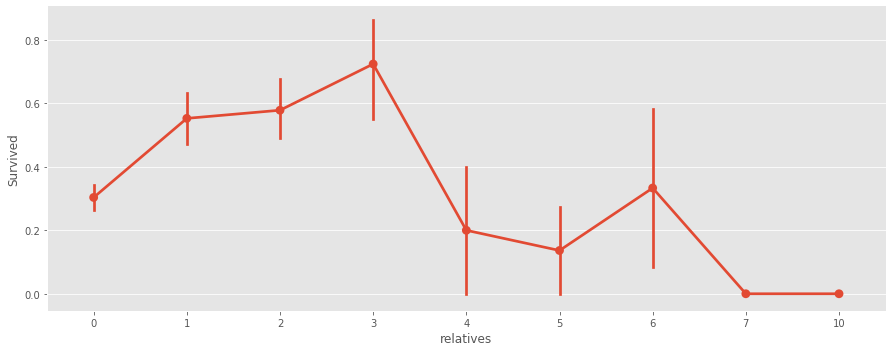

In [122]:
axes = sns.factorplot('relatives','Survived', data=train_df, aspect = 2.5, )

#### Here we can see that you had a high probabilty of survival with 1 to 3 realitves, but a lower one if you had less than 1 or more than 3 (except for some cases with 6 relatives).

# Data Preprocessing

In [123]:
# Drop the "PassengerId" from the train set as it does not contribute to survival.
# Not dropping it from test set as it is required for the submission.
train_df = train_df.drop(['PassengerId'], axis=1)

### Cabin
#### We have 687 missing values for Cabin. The cabin number 'C85' refers to the deck C, so we can extract the first letter into a new feature called Deck and convert this new feature into numeric values.

In [124]:
deck = {"A": 1, "B": 2, "C": 3, "D": 4, "E": 5, "F": 6, "G": 7, "U": 8}
data = [train_df, test_df]

for dataset in data:
    dataset['Cabin'] = dataset['Cabin'].fillna("U0")
    dataset['Deck'] = [cabin[0] for cabin in dataset['Cabin']]
    dataset['Deck'] = dataset['Deck'].map(deck)
    dataset['Deck'] = dataset['Deck'].fillna(0)
    dataset['Deck'] = dataset['Deck'].astype(int)
    
# we can now drop the cabin feature
train_df = train_df.drop(['Cabin'], axis=1)
test_df = test_df.drop(['Cabin'], axis=1)

In [125]:
# Let us see how it is distributed
train_df.Deck.value_counts()

8    687
3     59
2     47
4     33
5     32
1     15
6     13
7      4
0      1
Name: Deck, dtype: int64

### Age
#### For missing values in the Age feature, let us create an array of random numbers of size equal to the missing values and whose range is between +1 and -1 from the mean age

In [126]:
data = [train_df, test_df]

for dataset in data:
    mean = dataset["Age"].mean()
    std = dataset["Age"].std()
    is_null = dataset["Age"].isnull().sum()
    # compute random numbers between the mean, std and is_null
    rand_age = np.random.randint(mean - std, mean + std, size = is_null)
    # fill NaN values in Age column with random values generated
    age_slice = dataset["Age"].copy()
    age_slice[np.isnan(age_slice)] = rand_age
    dataset["Age"] = age_slice
    dataset["Age"] = dataset["Age"].astype(int)
    
print(f'Null values for Age in train data: {train_df.Age.isnull().sum()}')
print(f'Null values for Age in test data: {test_df.Age.isnull().sum()}')

Null values for Age in train data: 0
Null values for Age in test data: 0


## Embarked
#### As the embarked feature has only 2 missing values, we can just fill these with the most common value which is 'S'

In [127]:
train_df.Embarked.describe()

count     889
unique      3
top         S
freq      644
Name: Embarked, dtype: object

In [128]:
common_value = 'S'
data = [train_df, test_df]

for dataset in data:
    dataset['Embarked'] = dataset['Embarked'].fillna(common_value)

## Name
#### We will use the name feature to extract the Titles from the Name, so that we can build a new feature out of that.

In [129]:
data = [train_df, test_df]
titles = {"Mr": 1, "Miss": 2, "Mrs": 3, "Master": 4, "Uncommon": 5}

for dataset in data:
    # extract titles
    dataset['Title'] = dataset.Name.str.extract(' ([A-Za-z]+)\.', expand=False)
    # replace titles with a more common title or as Uncommon
    dataset['Title'] = dataset['Title'].replace(['Dr', 'Rev', 'Col', 'Major', 'Capt', 'Don', 'Sir', 'Lady', 'Countess',\
                                                 'Jonkheer', 'Dona'], 'Uncommon')
    dataset['Title'] = dataset['Title'].replace('Mlle', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Ms', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Mme', 'Mrs')
    # convert titles into numbers
    dataset['Title'] = dataset['Title'].map(titles)
    # filling NaN with 0, to get safe
    dataset['Title'] = dataset['Title'].fillna(0)
train_df = train_df.drop(['Name'], axis=1)
test_df = test_df.drop(['Name'], axis=1)

## Sex
#### Convert the Sex feature into numeric

In [130]:
genders = {"male": 0, "female": 1}
data = [train_df, test_df]

for dataset in data:
    dataset['Sex'] = dataset['Sex'].map(genders)

## Ticket

In [131]:
train_df = train_df.drop(['Ticket'], axis=1)
test_df = test_df.drop(['Ticket'], axis=1)

## Embarked:
#### Convert ‘Embarked’ feature into numeric.

In [132]:
ports = {"S": 0, "C": 1, "Q": 2}
data = [train_df, test_df]

for dataset in data:
    dataset['Embarked'] = dataset['Embarked'].map(ports)

# Creating Categories

## Age:
#### Now we need to convert the ‘Age’ feature. First we will convert it from float into integer. Then we will create the new ‘AgeGroup” variable, by categorizing every age into a group. Note that it is important to place attention on how you form these groups, since you don’t want, for example that 80% of your data falls into group 1.

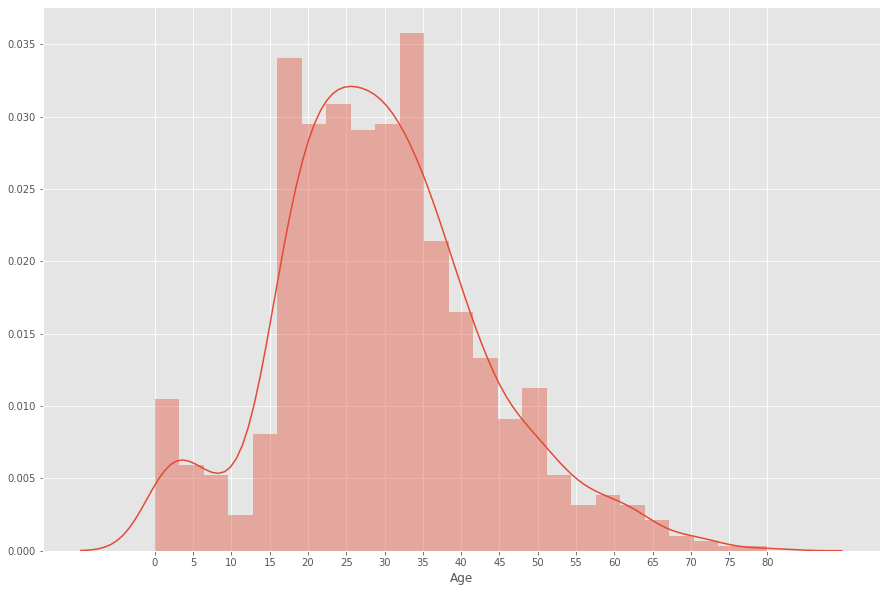

In [133]:
plt.figure(figsize=(15, 10))
sns.distplot(train_df.Age)
_ = plt.xticks(range(0,81,5), range(0,81,5))

In [134]:
data = [train_df, test_df]
for dataset in data:
    dataset['Age'] = dataset['Age'].astype(int)
    dataset.loc[ dataset['Age'] <= 11, 'Age'] = 0
    dataset.loc[(dataset['Age'] > 11) & (dataset['Age'] <= 18), 'Age'] = 1
    dataset.loc[(dataset['Age'] > 18) & (dataset['Age'] <= 22), 'Age'] = 2
    dataset.loc[(dataset['Age'] > 22) & (dataset['Age'] <= 27), 'Age'] = 3
    dataset.loc[(dataset['Age'] > 27) & (dataset['Age'] <= 33), 'Age'] = 4
    dataset.loc[(dataset['Age'] > 33) & (dataset['Age'] <= 40), 'Age'] = 5
    dataset.loc[(dataset['Age'] > 40) & (dataset['Age'] <= 66), 'Age'] = 6
    dataset.loc[ dataset['Age'] > 66, 'Age'] = 6

In [135]:
# let's see how it's distributed
train_df.Age.value_counts(dropna=False, normalize=True)*100

4    19.191919
6    18.069585
5    16.498316
3    15.600449
2    12.570146
1    10.437710
0     7.631874
Name: Age, dtype: float64

## Fare:
#### For the ‘Fare’ feature, we need to do the same as with the ‘Age’ feature, however, if we cut the range of the fare values into a few equally big categories, 80% of the values would fall into the first category. Fortunately, we can use pandas “qcut()” function, that we can use to see, how we can form the categories.

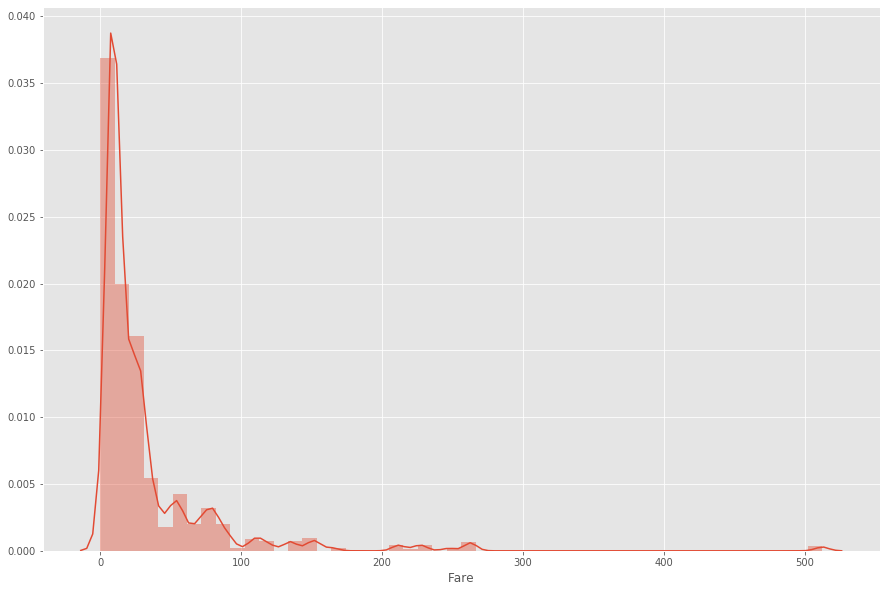

In [136]:
plt.figure(figsize=(15, 10))
sns.distplot(train_df.Fare)

In [137]:
pd.qcut(x=train_df.Fare, q=5).value_counts()

(7.854, 10.5]        184
(21.679, 39.688]     180
(-0.001, 7.854]      179
(39.688, 512.329]    176
(10.5, 21.679]       172
Name: Fare, dtype: int64

In [138]:
data = [train_df, test_df]

for dataset in data:
    dataset.loc[ dataset['Fare'] <= 7.854, 'Fare'] = 0
    dataset.loc[(dataset['Fare'] > 7.854) & (dataset['Fare'] <= 10.5), 'Fare'] = 1
    dataset.loc[(dataset['Fare'] > 10.5) & (dataset['Fare'] <= 21.679), 'Fare']   = 2
    dataset.loc[(dataset['Fare'] > 21.679) & (dataset['Fare'] <= 39.688), 'Fare']   = 3
    #dataset.loc[(dataset['Fare'] > 99) & (dataset['Fare'] <= 250), 'Fare']   = 4
    dataset.loc[ dataset['Fare'] > 39.688, 'Fare'] = 4
    dataset.Fare.fillna(0, inplace=True)
    
train_df.Fare.value_counts(dropna=False, normalize=True)*100

1.0    22.109989
3.0    20.314254
4.0    19.753086
2.0    19.191919
0.0    18.630752
Name: Fare, dtype: float64

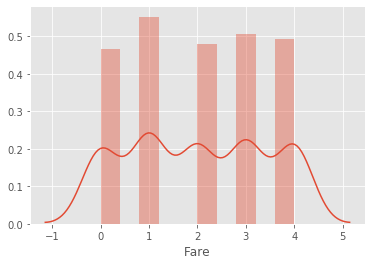

In [139]:
sns.distplot(train_df.Fare)

## Let's take a last look at the training set, before we start training the models.

In [140]:
train_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,relatives,Alone,Deck,Title
0,0,3,0,2,1,0,0.0,0,1,0.0,8,1
1,1,1,1,5,1,0,4.0,1,1,0.0,3,3
2,1,3,1,3,0,0,1.0,0,0,1.0,8,2
3,1,1,1,5,1,0,4.0,0,1,0.0,3,3
4,0,3,0,5,0,0,1.0,0,0,1.0,8,1


In [141]:
test_df.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,relatives,Alone,Deck,Title
0,892,3,0,5,0,0,0.0,2,0,1.0,8,1
1,893,3,1,6,1,0,0.0,0,1,0.0,8,3
2,894,2,0,6,0,0,1.0,2,0,1.0,8,1
3,895,3,0,3,0,0,1.0,0,0,1.0,8,1
4,896,3,1,2,1,1,2.0,0,2,0.0,8,3


In [165]:
X_train = train_df.drop("Survived", axis=1)
Y_train = train_df["Survived"]
X_test  = test_df.drop("PassengerId", axis=1).copy()

## Stochastic Gradient Descent (SGD):

In [166]:
sgd = linear_model.SGDClassifier(max_iter=5, tol=None)
sgd.fit(X_train, Y_train)
Y_pred = sgd.predict(X_test)

sgd.score(X_train, Y_train)

acc_sgd = round(sgd.score(X_train, Y_train) * 100, 2)

## Random Forest:

In [167]:
random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(X_train, Y_train)

Y_prediction = random_forest.predict(X_test)

random_forest.score(X_train, Y_train)
acc_random_forest = round(random_forest.score(X_train, Y_train) * 100, 2)

## Logistic Regression:

In [168]:
logreg = LogisticRegression()
logreg.fit(X_train, Y_train)

Y_pred = logreg.predict(X_test)

acc_log = round(logreg.score(X_train, Y_train) * 100, 2)

## K Nearest Neighbor:

In [169]:
# KNN
knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(X_train, Y_train)
Y_pred = knn.predict(X_test)
acc_knn = round(knn.score(X_train, Y_train) * 100, 2)

## Gaussian Naive Bayes:

In [170]:
gaussian = GaussianNB()
gaussian.fit(X_train, Y_train)
Y_pred = gaussian.predict(X_test)
acc_gaussian = round(gaussian.score(X_train, Y_train) * 100, 2)

## Perceptron:

In [171]:
perceptron = Perceptron(max_iter=5)
perceptron.fit(X_train, Y_train)

Y_pred = perceptron.predict(X_test)

acc_perceptron = round(perceptron.score(X_train, Y_train) * 100, 2)

## Linear Support Vector Machine:

In [172]:
linear_svc = LinearSVC()
linear_svc.fit(X_train, Y_train)

Y_pred = linear_svc.predict(X_test)

acc_linear_svc = round(linear_svc.score(X_train, Y_train) * 100, 2)

## Decision Tree

In [173]:
decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, Y_train)
Y_pred = decision_tree.predict(X_test)
acc_decision_tree = round(decision_tree.score(X_train, Y_train) * 100, 2)

### Which is the best Model?

In [175]:
results = pd.DataFrame({
    'Model': ['Support Vector Machines', 'KNN', 'Logistic Regression', 
              'Random Forest', 'Naive Bayes', 'Perceptron', 
              'Stochastic Gradient Decent', 'Decision Tree'],
    'Score': [acc_linear_svc, acc_knn, acc_log, 
              acc_random_forest, acc_gaussian, acc_perceptron, 
              acc_sgd, acc_decision_tree]})
results.sort_values(by='Score', ascending=False, inplace=True)
results.set_index('Score', inplace=True)
results.head(9)

,Model
Score,
92.82,Random Forest
92.82,Decision Tree
85.30,KNN
81.26,Support Vector Machines
80.81,Logistic Regression
80.81,Perceptron
78.68,Naive Bayes
78.11,Stochastic Gradient Decent


#### As we can see, the Random Forest classifier goes on the first place. But first, let us check, how random-forest performs, when we use cross validation.

## K-Fold Cross Validation:

In [176]:
from sklearn.model_selection import cross_val_score
rf = RandomForestClassifier(n_estimators=100)
scores = cross_val_score(rf, X_train, Y_train, cv=10, scoring = "accuracy")
print("Scores:", scores)
print("Mean:", scores.mean())
print("Standard Deviation:", scores.std())

Scores: [0.75555556 0.82222222 0.71910112 0.86516854 0.86516854 0.83146067
 0.79775281 0.73033708 0.84269663 0.85227273]
Mean: 0.8081735898308932
Standard Deviation: 0.052194589752048874


## Feature Importance
##### One great quality of random forest is that they make it very easy to measure the relative importance of each feature. Sklearn measure a features importance by looking at how much the tree nodes, that use that feature, reduce impurity on average (across all trees in the forest). It computes this score automatically for each feature after training and scales the results so that the sum of all importances is equal to 1. We will acces the feature importances below:

In [182]:
importances = pd.DataFrame({'feature':X_train.columns,'importance':np.round(random_forest.feature_importances_*100,3)})
importances = importances.sort_values('importance',ascending=False).set_index('feature')
importances.head(15)

,importance
feature,
Title,20.110
Sex,17.847
Age,15.549
Deck,9.406
Fare,9.032
Pclass,8.803
relatives,6.386
Embarked,5.172
SibSp,3.973


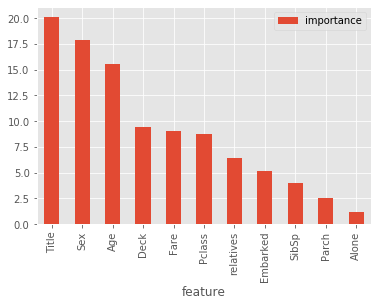

In [183]:
importances.plot.bar()

## Conclusion:
##### Alone and Parch doesn’t play a significant role in our random forest classifiers prediction process. Because of that we can  drop them from the dataset and train the classifier again. We could also remove more or less features, but this would need a more detailed investigation of the features effect on our model.

In [185]:
train_df.drop(['Alone', 'Parch'], axis=1, inplace=True)
test_df.drop(['Alone', 'Parch'], axis=1, inplace=True)

### Training random forest again:

In [186]:
random_forest = RandomForestClassifier(n_estimators=100, oob_score = True)
random_forest.fit(X_train, Y_train)
Y_prediction = random_forest.predict(X_test)

random_forest.score(X_train, Y_train)

acc_random_forest = round(random_forest.score(X_train, Y_train) * 100, 2)
print(round(acc_random_forest,2,), "%")

92.82 %


In [187]:
print("oob score:", round(random_forest.oob_score_, 4)*100, "%")

oob score: 80.13 %


## Hyperparameter Tuning

In [188]:
param_grid = { "criterion" : ["gini", "entropy"], "min_samples_leaf" : [1, 5, 10, 25, 50, 70],\
              "min_samples_split" : [2, 4, 10, 12, 16, 18, 25, 35], "n_estimators": [100, 400, 700, 1000, 1500]}
from sklearn.model_selection import GridSearchCV, cross_val_score
rf = RandomForestClassifier(n_estimators=100, max_features='auto', oob_score=True, random_state=1, n_jobs=-1)
clf = GridSearchCV(estimator=rf, param_grid=param_grid, n_jobs=-1)
clf.fit(X_train, Y_train)

GridSearchCV(cv='warn', error_score='raise-deprecating',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=-1,
            oob_score=True, random_state=1, verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid={'criterion': ['gini', 'entropy'], 'min_samples_leaf': [1, 5, 10, 25, 50, 70], 'min_samples_split': [2, 4, 10, 12, 16, 18, 25, 35], 'n_estimators': [100, 400, 700, 1000, 1500]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [189]:
clf.best_params_

{'criterion': 'gini',
 'min_samples_leaf': 5,
 'min_samples_split': 35,
 'n_estimators': 700}

### Test new Parameters:

In [190]:
# Random Forest
random_forest = RandomForestClassifier(criterion = "gini", min_samples_leaf = 5, min_samples_split = 35,   
                                       n_estimators=700, max_features='auto', oob_score=True, 
                                       random_state=1, n_jobs=-1)

random_forest.fit(X_train, Y_train)
Y_prediction = random_forest.predict(X_test)

random_forest.score(X_train, Y_train)

print("oob score:", round(random_forest.oob_score_, 4)*100, "%")

oob score: 82.94 %


### Confusion Matrix:

In [192]:
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix
predictions = cross_val_predict(random_forest, X_train, Y_train, cv=3)
confusion_matrix(Y_train, predictions)

array([[490,  59],
       [ 90, 252]], dtype=int64)

### Precision and Recall:
##### Our model predicts 81% of the time, a passengers survival correctly (precision). The recall tells us that it predicted the survival of 73 % of the people who actually survived.

In [193]:
from sklearn.metrics import precision_score, recall_score

print("Precision:", precision_score(Y_train, predictions))
print("Recall:",recall_score(Y_train, predictions))

Precision: 0.8102893890675241
Recall: 0.7368421052631579


### F1-Score

In [46]:
from sklearn.metrics import f1_score
f1_score(Y_train, predictions)

0.7760736196319019

### Precision Recall Curve

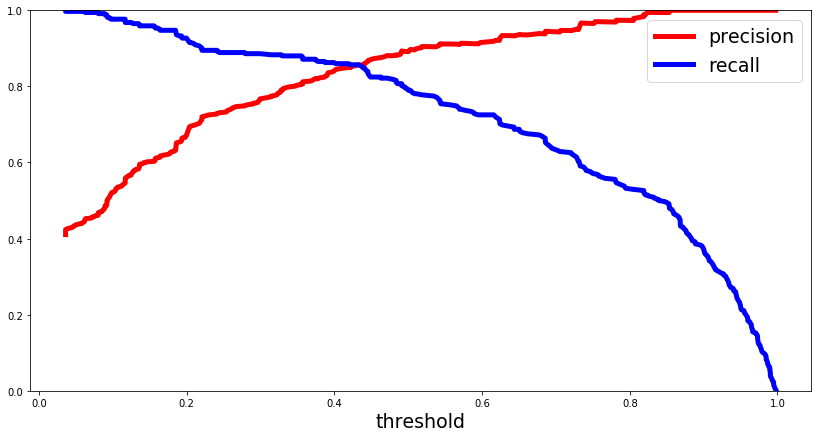

In [47]:
from sklearn.metrics import precision_recall_curve

# getting the probabilities of our predictions
y_scores = random_forest.predict_proba(X_train)
y_scores = y_scores[:,1]

precision, recall, threshold = precision_recall_curve(Y_train, y_scores)
def plot_precision_and_recall(precision, recall, threshold):
    plt.plot(threshold, precision[:-1], "r-", label="precision", linewidth=5)
    plt.plot(threshold, recall[:-1], "b", label="recall", linewidth=5)
    plt.xlabel("threshold", fontsize=19)
    plt.legend(loc="upper right", fontsize=19)
    plt.ylim([0, 1])

plt.figure(figsize=(14, 7))
plot_precision_and_recall(precision, recall, threshold)
plt.show()

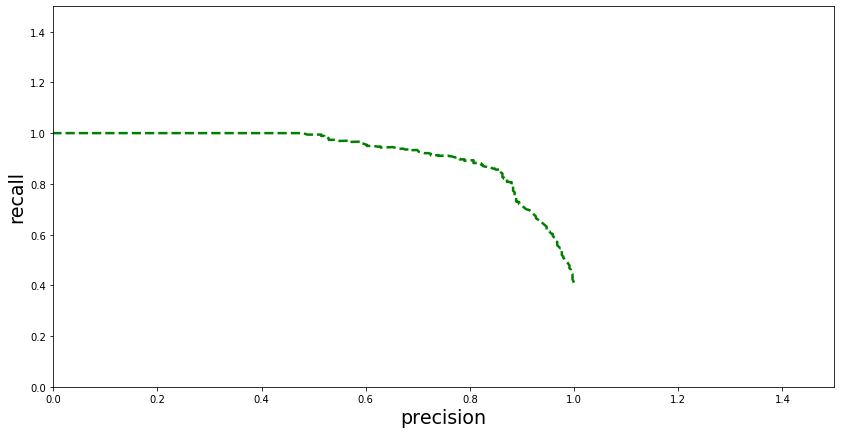

In [48]:
def plot_precision_vs_recall(precision, recall):
    plt.plot(recall, precision, "g--", linewidth=2.5)
    plt.ylabel("recall", fontsize=19)
    plt.xlabel("precision", fontsize=19)
    plt.axis([0, 1.5, 0, 1.5])

plt.figure(figsize=(14, 7))
plot_precision_vs_recall(precision, recall)
plt.show()

### ROC AUC Curve

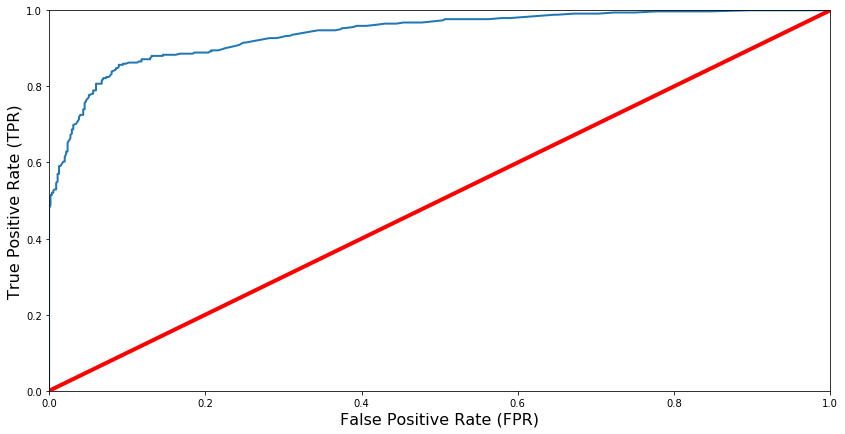

In [49]:
from sklearn.metrics import roc_curve
# compute true positive rate and false positive rate
false_positive_rate, true_positive_rate, thresholds = roc_curve(Y_train, y_scores)
# plotting them against each other
def plot_roc_curve(false_positive_rate, true_positive_rate, label=None):
    plt.plot(false_positive_rate, true_positive_rate, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'r', linewidth=4)
    plt.axis([0, 1, 0, 1])
    plt.xlabel('False Positive Rate (FPR)', fontsize=16)
    plt.ylabel('True Positive Rate (TPR)', fontsize=16)

plt.figure(figsize=(14, 7))
plot_roc_curve(false_positive_rate, true_positive_rate)
plt.show()

### ROC AUC Score

In [50]:
from sklearn.metrics import roc_auc_score
r_a_score = roc_auc_score(Y_train, y_scores)
print("ROC-AUC-Score:", r_a_score)

ROC-AUC-Score: 0.9393394688908063


In [194]:
Y_prediction

array([0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1,
       0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0,

In [195]:
submission = pd.concat([test_df, pd.Series(Y_prediction)], axis=1)
submission.head()

,PassengerId,Pclass,Sex,Age,SibSp,Fare,Embarked,relatives,Deck,Title,0
0,892,3,0,5,0,0.0,2,0,8,1,0
1,893,3,1,6,1,0.0,0,1,8,3,0
2,894,2,0,6,0,1.0,2,0,8,1,0
3,895,3,0,3,0,1.0,0,0,8,1,0
4,896,3,1,2,1,2.0,0,2,8,3,1


In [196]:
submission = submission[['PassengerId', 0]]
submission.columns = ['PassengerId', 'Survived']
submission.set_index('PassengerId', inplace=True)
submission.head()

,Survived
PassengerId,
892,0
893,0
894,0
895,0
896,1


In [197]:
submission.to_csv('submission.csv')